In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

In [64]:
df_player= pd.read_csv('data/players.csv', memory_map=True)
df_match = pd.read_csv('data/match.csv' ,memory_map=True)
df_match_500 = pd.read_csv('data/match.csv' ,memory_map=True, nrows=500)
df_hero_names = pd.read_csv('data/hero_names.csv', memory_map=True  )
# df_chat = pd.read_csv('data/dota-2-matches/chat.csv', memory_map=True)

## Löschen nichtbenötigter Spalten in Players und Match


In [65]:
df_player.drop([
    'account_id',
    'gold_per_min',
    'xp_per_min',
    'denies',
    'last_hits',
    'stuns',
    'hero_damage',
    'hero_healing',
    'tower_damage',
    'item_0',
    'item_1',
    'item_2',
    'item_3',
    'item_4',
    'item_5',
    'level',
    'leaver_status',
    'xp_hero',
    'xp_creep',
    'xp_roshan',
    'xp_other',
    'gold_other',
    'gold_death',
    'gold_buyback',
    'gold_abandon',
    'gold_sell',
    'gold_destroying_structure',
    'gold_killing_heros',
    'gold_killing_creeps',
    'gold_killing_roshan',
    'gold_killing_couriers',
    'unit_order_none',
    'unit_order_move_to_position',
    'unit_order_move_to_target',
    'unit_order_attack_move',
    'unit_order_attack_target',
    'unit_order_cast_position',
    'unit_order_cast_target',
    'unit_order_cast_target_tree',
    'unit_order_cast_no_target',
    'unit_order_cast_toggle',
    'unit_order_hold_position',
    'unit_order_train_ability',
    'unit_order_drop_item',
    'unit_order_give_item',
    'unit_order_pickup_item',
    'unit_order_pickup_rune',
    'unit_order_purchase_item',
    'unit_order_sell_item',
    'unit_order_disassemble_item',
    'unit_order_move_item',
    'unit_order_cast_toggle_auto',
    'unit_order_stop',
    'unit_order_taunt',
    'unit_order_buyback',
    'unit_order_glyph',
    'unit_order_eject_item_from_stash',
    'unit_order_cast_rune',
    'unit_order_ping_ability',
    'unit_order_move_to_direction',
    'unit_order_patrol',
    'unit_order_vector_target_position',
    'unit_order_radar',
    'unit_order_set_item_combine_lock',
    'unit_order_continue'], axis=1, inplace=True)




In [66]:
df_match.drop([
    'start_time',
    'tower_status_radiant',
    'tower_status_dire',
    'barracks_status_radiant',
    'barracks_status_dire',
    'first_blood_time',
    'game_mode',
    'negative_votes',
    'positive_votes',
    'cluster'],
    axis=1,
    inplace=True)

In [67]:
df_match.head()

match_id  duration radiant_win
0         0      2375        True
1         1      2582       False
2         2      2716       False
3         3      3085       False
4         4      1887        True

## Erzeugen einer Matrix, die es zulässt, den Spielerfolg der Spieler anzuzeigen

In [68]:
df_match["gewinner"] = df_match.radiant_win.map(lambda x:"radiant" if x else "dire")
df_match.drop("radiant_win", axis=1, inplace=True)
mat_1 = df_match.merge(df_player,on=['match_id'])
# mat_125 = df_match_50000.merge(df_match_50000,on='match_id').merge(df_players[df_players["player_slot"]>6],on='match_id')

In [69]:
mat_1["team"]= mat_1.player_slot.map(lambda x:"radiant" if x<10 else "dire")

In [70]:
mat_1.head(10)

match_id  duration gewinner  hero_id  player_slot  gold  gold_spent  kills  \
0         0      2375  radiant       86            0  3261       10960      9   
1         0      2375  radiant       51            1  2954       17760     13   
2         0      2375  radiant       83            2   110       12195      0   
3         0      2375  radiant       11            3  1179       22505      8   
4         0      2375  radiant       67            4  3307       23825     20   
5         0      2375  radiant      106          128   476       12285      5   
6         0      2375  radiant      102          129   317       10355      4   
7         0      2375  radiant       46          130  2390       13395      4   
8         0      2375  radiant        7          131   475        5035      1   
9         0      2375  radiant       73          132    60       17550      1   

   deaths  assists     team  
0       3       18  radiant  
1       3       18  radiant  
2       4       15  radiant  
3       4       19  radiant  
4       3       17  radiant  
5       6        8     dire  
6      13        5     dire  
7       8        6     dire  
8      14        8     dire  
9      11        6     dire

## Hinzufügen einer Spalte mit der Gesammtsumme des Goldes pro Spieler

In [71]:
mat_1["total_gold"] =  mat_1["gold"] + mat_1["gold_spent"]


In [72]:
series = mat_1.groupby(["match_id", "team"]).sum().total_gold

In [73]:
series_total = mat_1.groupby(["match_id"]).sum().total_gold

In [74]:
series_total = series_total.reset_index()
series = series.reset_index()

In [75]:
series_total = series_total.merge(df_match[["match_id", "gewinner"]], on="match_id")
series_total.head()

match_id  total_gold gewinner
0         0      160394  radiant
1         1      190921     dire
2         2      150281     dire
3         3      183524     dire
4         4      134089  radiant

In [76]:
series_total = series_total.merge(series.rename(columns=({"total_gold":"teamgold"})), on="match_id")


In [77]:
series_total['anteil'] = series_total.teamgold/series_total.total_gold*100
series_total.head()

match_id  total_gold gewinner     team  teamgold     anteil
0         0      160394  radiant     dire     62338  38.865544
1         0      160394  radiant  radiant     98056  61.134456
2         1      190921     dire     dire    116835  61.195468
3         1      190921     dire  radiant     74086  38.804532
4         2      150281     dire     dire     92797  61.748990

In [78]:
series_total[series_total.gewinner==series_total.team ][series_total.anteil<50].shape

C:\Users\Adria\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(851, 6)

In [79]:
lower = 40
upper = 20
perc = 1
bins=[x for x in range(lower,100-upper,1)]
print(len(bins))
series_total['bereiche_anteil'] = pd.cut(
    series_total.anteil,
    bins=bins,
    labels=bins[:-1])

series_total.head()

40


match_id  total_gold gewinner     team  teamgold     anteil bereiche_anteil
0         0      160394  radiant     dire     62338  38.865544             NaN
1         0      160394  radiant  radiant     98056  61.134456            61.0
2         1      190921     dire     dire    116835  61.195468            61.0
3         1      190921     dire  radiant     74086  38.804532             NaN
4         2      150281     dire     dire     92797  61.748990            61.0

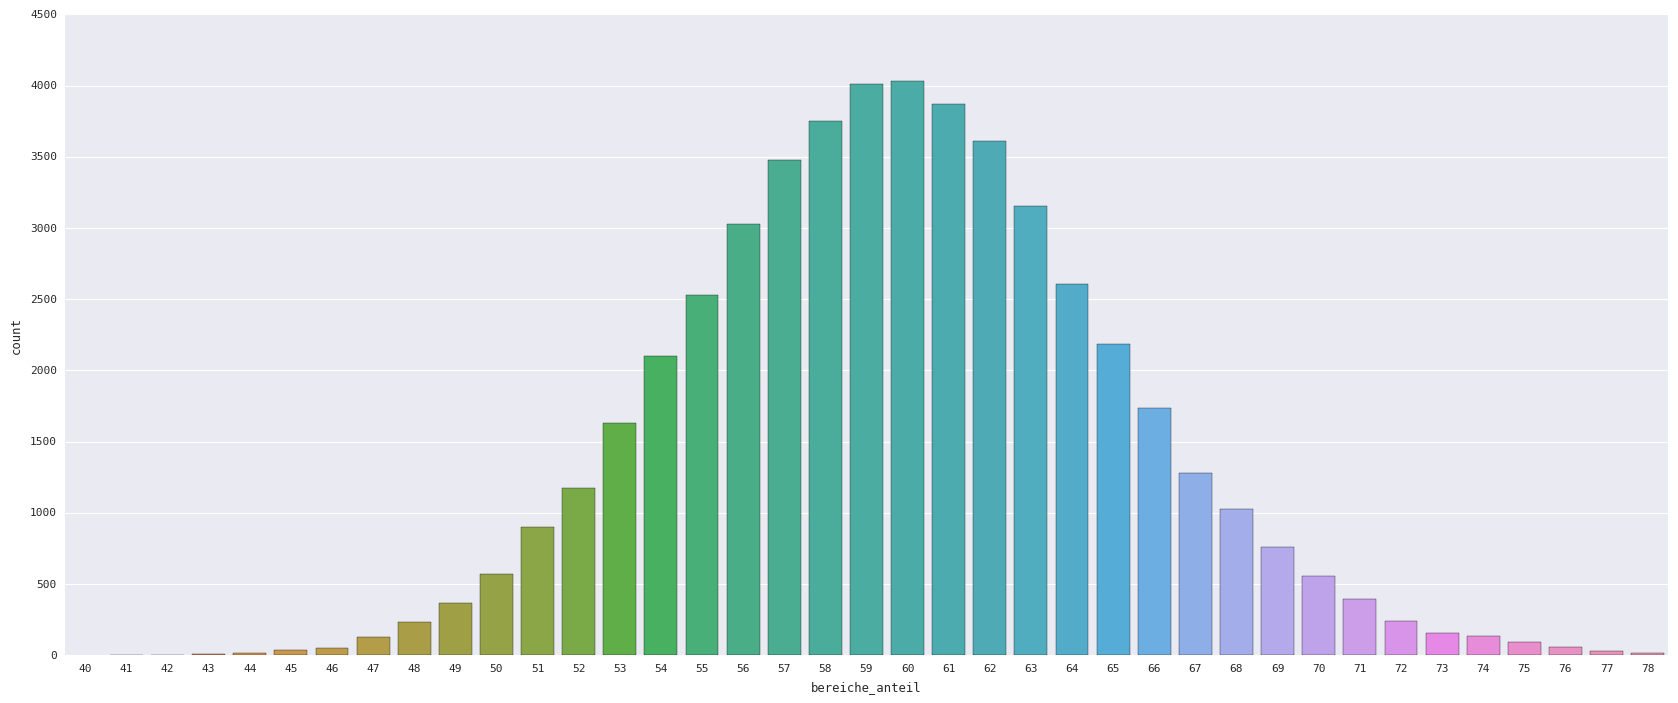

In [80]:
plt.figure(figsize=(20.69,8.27))
sns.countplot(x='bereiche_anteil',data=series_total[series_total.gewinner == series_total.team])

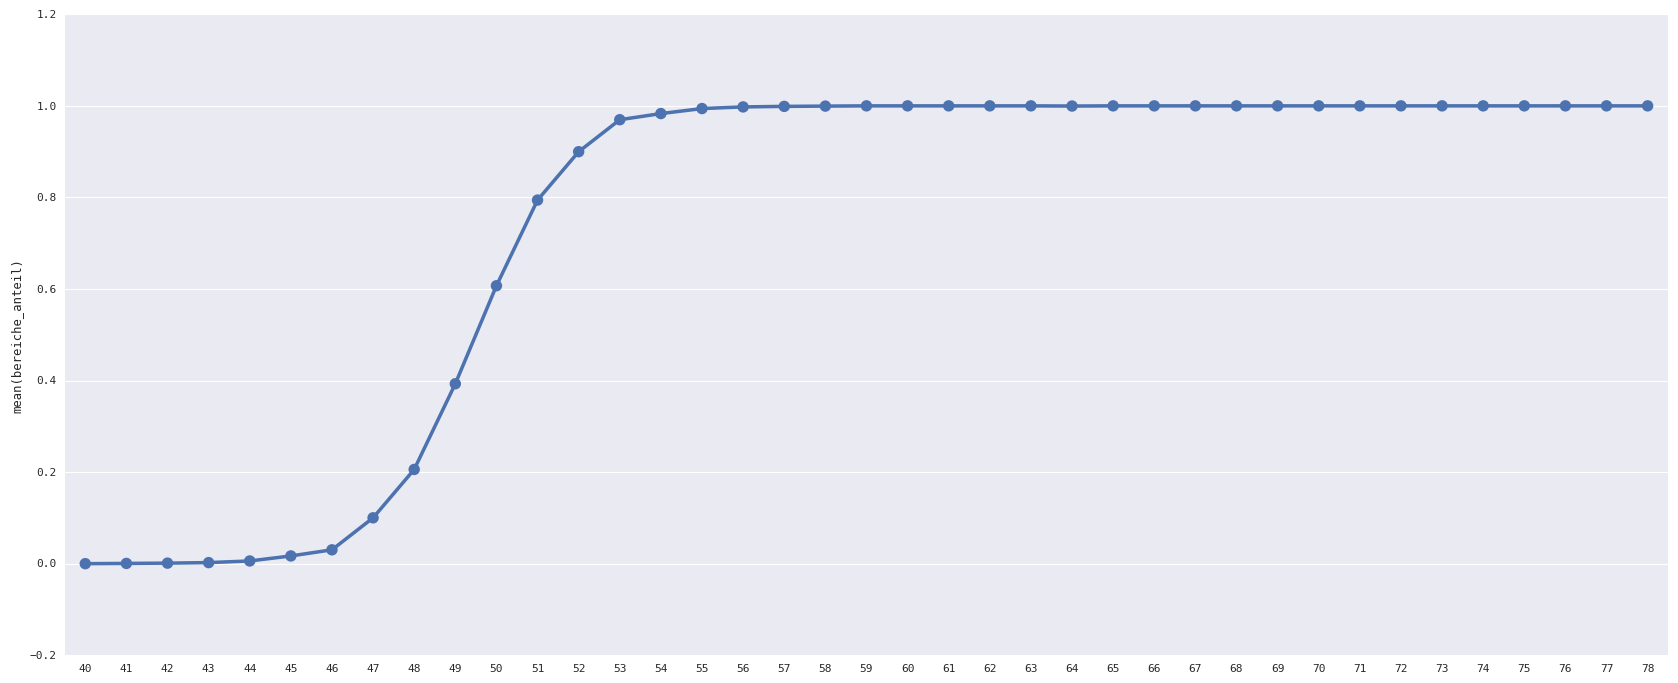

In [81]:
 x = (series_total \
 .bereiche_anteil \
 .value_counts()-series_total[series_total \
 .gewinner != series_total.team] \
 .bereiche_anteil \
 .value_counts())/series_total \
 .bereiche_anteil \
 .value_counts()

plt.figure(figsize=(20.69,8.27))
sns.pointplot( x=x.index , y=x)




In [82]:
stats.linregress(series_total.anteil, series_total.gewinner.map(lambda x: 1 if x=="radiant" else 0 ))

LinregressResult(slope=-4.1436818451406479e-20, intercept=0.51885999999999999, rvalue=-9.5605326533158619e-19, pvalue=0.99999999999999978, stderr=0.00013705934639404965)

In [83]:
np.polyfit(series_total.anteil, series_total.gewinner.map(lambda x: 1 if x=="radiant" else 0 ), 1)

array([  2.36465117e-17,   5.18860000e-01])

In [85]:
sns.regplot(x=x.index, y=x)

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [87]:
x.reset_index

<bound method Series.reset_index of 40    0.000000
41    0.000533
42    0.001150
43    0.002306
44    0.005896
45    0.016854
46    0.030267
47    0.100153
48    0.205805
49    0.392971
50    0.607029
51    0.794195
52    0.899847
53    0.969733
54    0.983146
55    0.994104
56    0.997694
57    0.998850
58    0.999467
59    1.000000
60    1.000000
61    1.000000
62    1.000000
63    1.000000
64    0.999616
65    1.000000
66    1.000000
67    1.000000
68    1.000000
69    1.000000
70    1.000000
71    1.000000
72    1.000000
73    1.000000
74    1.000000
75    1.000000
76    1.000000
77    1.000000
78    1.000000
Name: bereiche_anteil, dtype: float64>